# Feature Scaling

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math

get_ipython().run_line_magic('matplotlib', 'notebook')

## Example Problem

## Traning data

In [2]:
data = np.loadtxt("./data/houses.txt", delimiter=',')
X_train = data[:,:4]
y_train = data[:,4]

X_features = ['size(sqft)','bedrooms','floors','age']

## Plot Features vs. Target

<IPython.core.display.Javascript object>


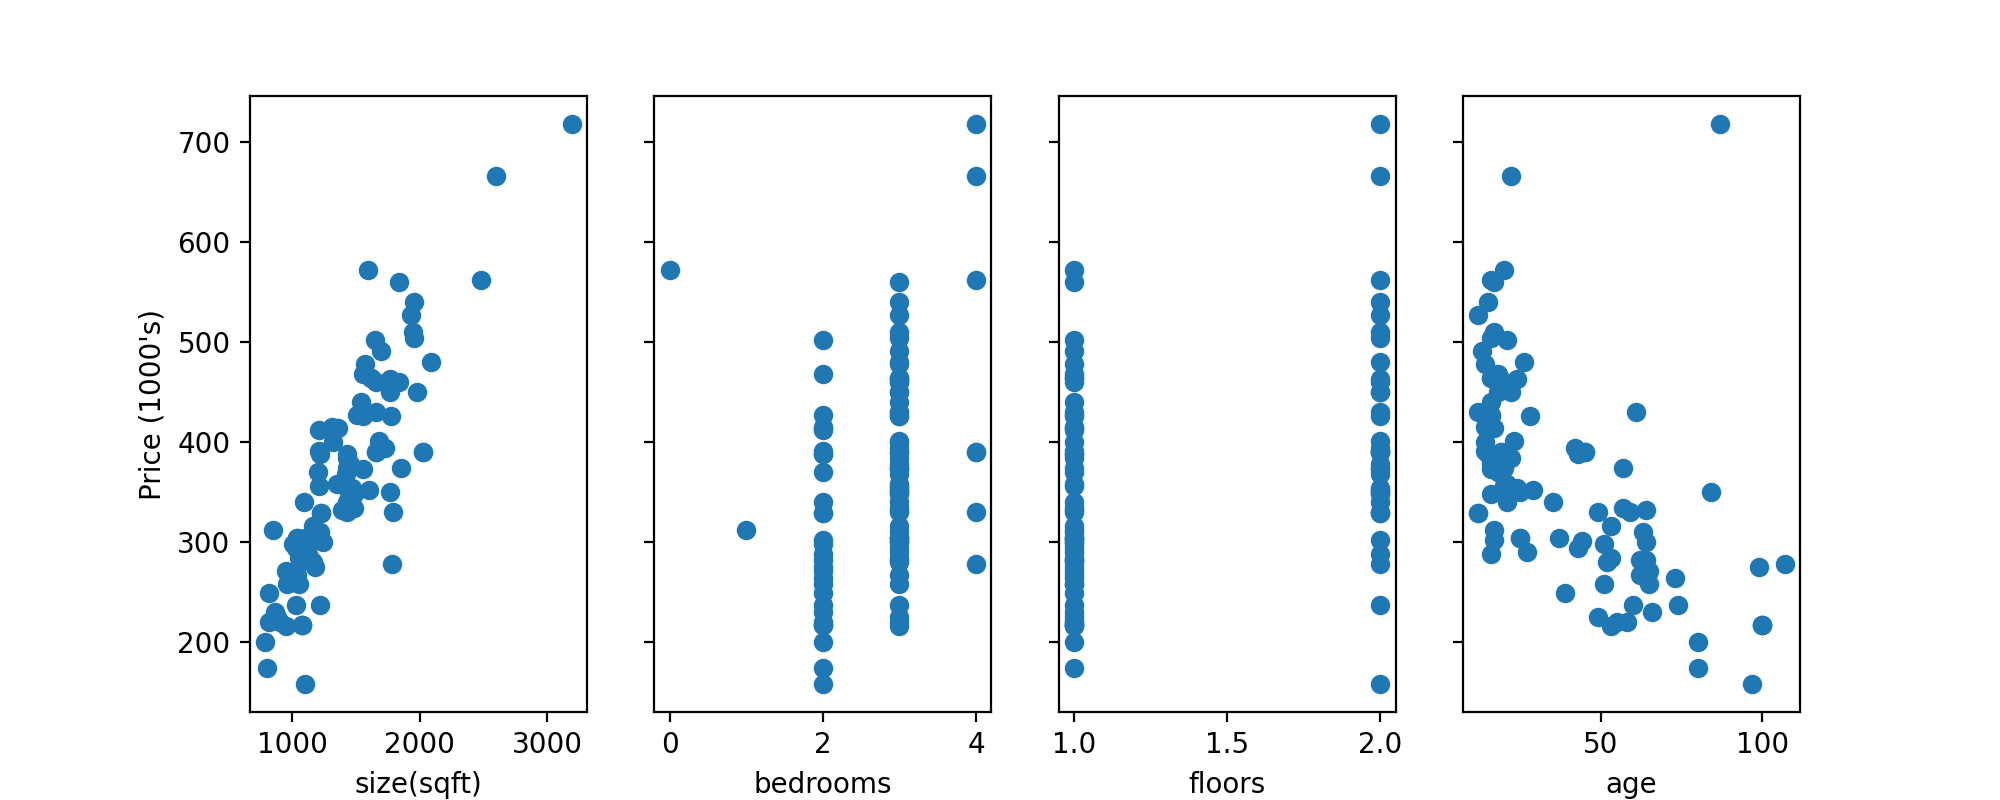

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(10, 4), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (1000's)")

plt.show()

## Mean Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{x_{j,max} - x_{j,min}} \tag{1} \ ,$$

where $\mu_n$ is the mean value of the feature vector $\mathbf{x}_j$ over all training examples.

In [4]:
X_train_mean_norm = np.empty_like(X_train)

for i in range(X_train.shape[1]):
    mu = np.mean(X_train[:,i])
    xmax = np.max(X_train[:,i])
    xmin = np.min(X_train[:,i])
    
    X_train_mean_norm[:,i] = (X_train[:,i] - mu)/(xmax - xmin)

## Z-Score Normalization

$$ \mathbf{x}_j = \frac{\mathbf{x}_j - \mu_j}{\sigma_j} \tag{2} \ ,$$

where $\mu_n$ is the mean value and $\sigma_j$ is the standard deviation of the feature vector $\mathbf{x}_j$ over all training examples.

In [5]:
X_train_zscore_norm = np.empty_like(X_train)

for i in range(X_train.shape[1]):
    mu = np.mean(X_train[:,i])
    sigma = np.std(X_train[:,i])
    
    X_train_zscore_norm[:,i] = (X_train[:,i] - mu)/sigma

## Plot Unnormalized vs. Normalized Features

<IPython.core.display.Javascript object>


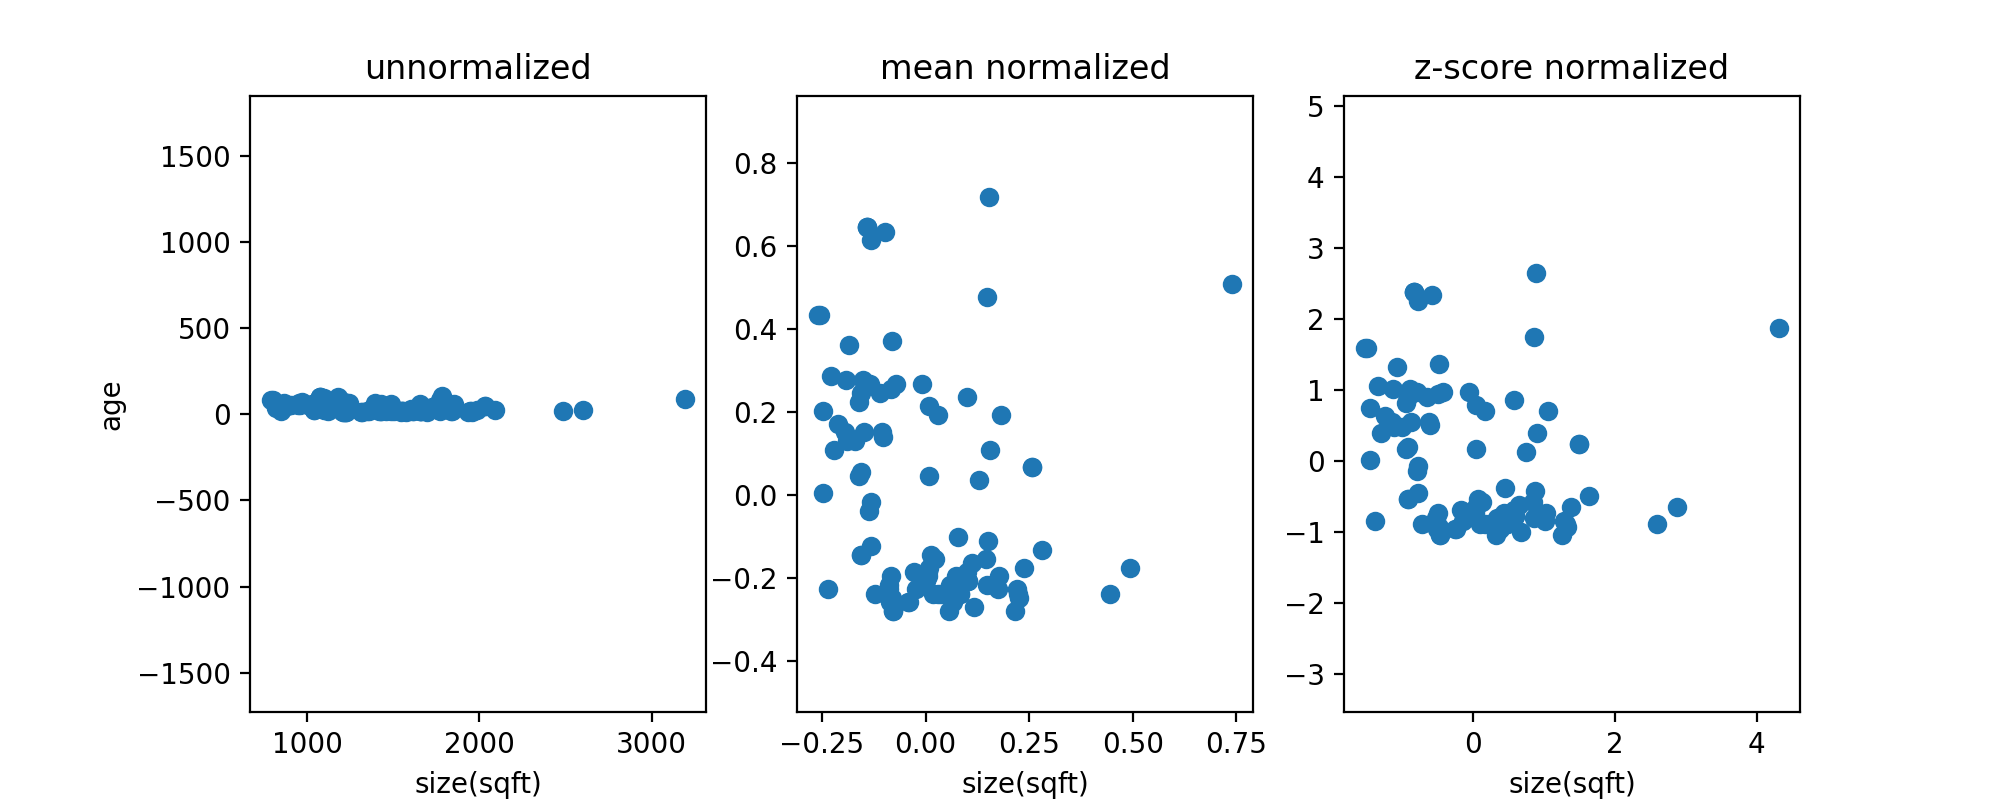

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

#fig.suptitle('Unnormalized vs. Z-Score Normalized Features')
ax1.scatter(X_train[:,0],X_train[:,3])
ax1.set_title("unnormalized")
ax1.axis('equal')
ax2.scatter(X_train_mean_norm[:,0],X_train_mean_norm[:,3])
ax2.set_title("mean normalized")
ax2.axis('equal')
ax3.scatter(X_train_zscore_norm[:,0],X_train_zscore_norm[:,3])
ax3.set_title("z-score normalized")
ax3.axis('equal')

ax1.set_xlabel(X_features[0])
ax2.set_xlabel(X_features[0])
ax3.set_xlabel(X_features[0])

ax1.set_ylabel(X_features[3])

plt.show()

## Define Cost-Function

In [7]:
def compute_cost(X,y,w,b):

    m = X.shape[0] # number of training examples
    
    sum_cost = 0
    
    for i in range(m):
        fwb = np.dot(w,X[i])+ b
        sum_i = (fwb - y[i])**2
        sum_cost = sum_cost + sum_i

    cost_value = sum_cost/(2*m)
    
    return cost_value

## Define Function for Gradient Caluclation

In [8]:
def compute_gradient(X,y,w,b):
    
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features
    
    sum_dw = np.zeros(n)
    sum_db = 0
    
    for i in range(m):
        cost = np.dot(w,X[i])+ b - y[i]
        sum_db += cost
        for j in range(n):
            sum_dw[j] = sum_dw[j] + cost * X[i,j]
        
    dj_dw = sum_dw/m    
    dj_db = sum_db/m
    
    return dj_db, dj_dw

## Define Gradient Descent Function for Optimizating the Parameter

In [11]:
def gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter):
    
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []
    
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    
    for i in range(num_iter):
        # compute cost value
        J_history.append(compute_cost(X,y,w,b))
        
        # compute gradient
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        
        # update parameter w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
        if i% math.ceil(num_iter/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
        
    print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
        
    return w, b, J_history, w_history, b_history

## Run Gradient Descent Algorithm

In [12]:
X = X_train_zscore_norm
y = y_train

b_init = 0.
w_init = np.array([ 1, 1, 1, 1])

cost_function = compute_cost
gradient_function = compute_gradient

alpha = 0.01
num_iter = 2000

w,b,J_history,w_history, b_history = gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.94994e+04  1.9e+00  1.3e+00  1.3e+00  4.0e-01  3.6e+00 -8.7e+01 -2.8e+01 -3.1e+01  6.0e+01 -3.6e+02
      200 1.87552e+03  6.8e+01 -1.5e+00 -5.5e+00 -3.9e+01  3.1e+02 -1.5e+01  6.6e+00  9.5e+00  3.7e+00 -4.9e+01
      400 3.67885e+02  8.9e+01 -1.1e+01 -1.9e+01 -4.1e+01  3.6e+02 -7.2e+00  3.3e+00  4.7e+00 -3.8e-01 -6.5e+00
      600 2.53700e+02  9.9e+01 -1.6e+01 -2.6e+01 -4.0e+01  3.6e+02 -3.7e+00  1.7e+00  2.3e+00 -5.4e-01 -8.7e-01
      800 2.28631e+02  1.0e+02 -1.9e+01 -2.9e+01 -3.9e+01  3.6e+02 -1.9e+00  9.2e-01  1.1e+00 -3.4e-01 -1.2e-01
     1000 2.22077e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.9e-01  4.8e-01  5.7e-01 -1.8e-01 -1.6e-02
     1200 2.20339e+02  1.1e+02 -2.1e+01 -3.2e+01 -3.8e+01  3.6e+02 -5.1e-01  2.5e-01  2.9e-01 -9.7e-02 -

## Optimized Parameter Value Pair

In [ ]:
print(f'Optimized values for w : {w}')
print(f'Optimized value for b : {b:0.3f}')

## Comparison Predicted vs. Target Values

In [ ]:
y_pred = np.zeros(X_train_zscore_norm.shape[0])
for i in range(X_train_zscore_norm.shape[0]):
    y_pred[i] = np.dot(w,X_train_zscore_norm[i])+ b
    
fig,ax=plt.subplots(1,4,figsize=(10, 4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='orange', label = 'predict')

ax[0].set_ylabel("Price"); ax[0].legend();

fig.suptitle("target versus prediction using z-score normalized model")

plt.show()

## Visualize Cost-Function

In [ ]:
plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(np.arange(len(J_history[:])),J_history[:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration")

plt.show()